In [32]:
import pandas as pd

#load dataset into a Pandas dataframe
df = pd.read_csv('Titanic.csv')

#Display first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [33]:
#Explore the dataset
print(df.info())

print(df.describe())

print(df.describe(include=['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [45]:
#Remove unrelated column
df = df.drop(['PassengerId'], axis=1)

#Check and handle for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

print("Missing values after handling:\n", (df.isnull().sum()))

Missing values:
 Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64
Missing values after handling:
 Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64


/var/folders/sj/h_3qsh3s2vv43h9m3cd623xc0000gn/T/ipykernel_97806/4086406648.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/var/folders/sj/h_3qsh3s2vv43h9m3cd623xc0000gn/T/ipykernel_97806/4086406648.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

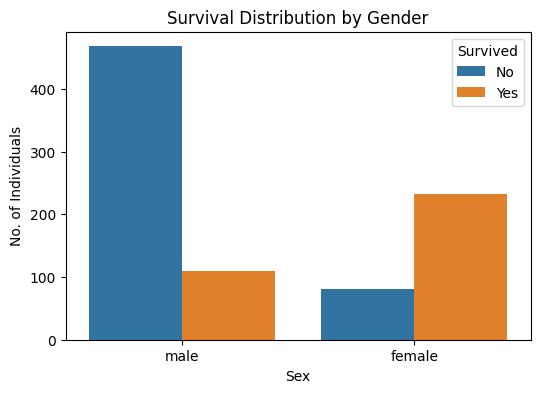

In [35]:
#Visualise the data using seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of survival based on gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('No. of Individuals')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

df

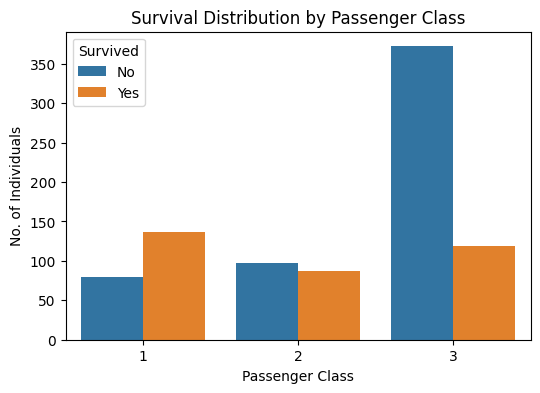

In [36]:
# Distribution of survival based on passenger class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('No. of Individuals')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

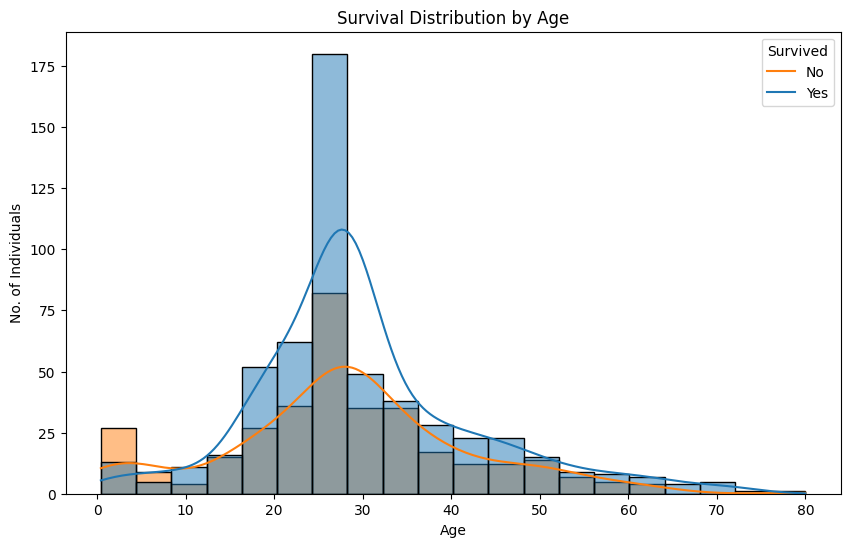

In [37]:
# Distribution of survival based on age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('No. of Individuals')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

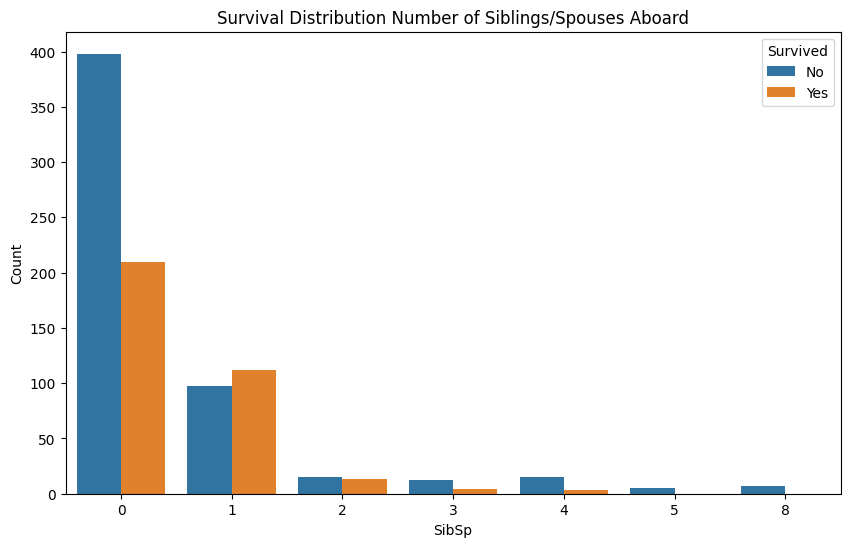

In [52]:
# Distribution of survival based on number of siblings/spouses and parents/children aboard
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival Distribution Number of Siblings/Spouses Aboard')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

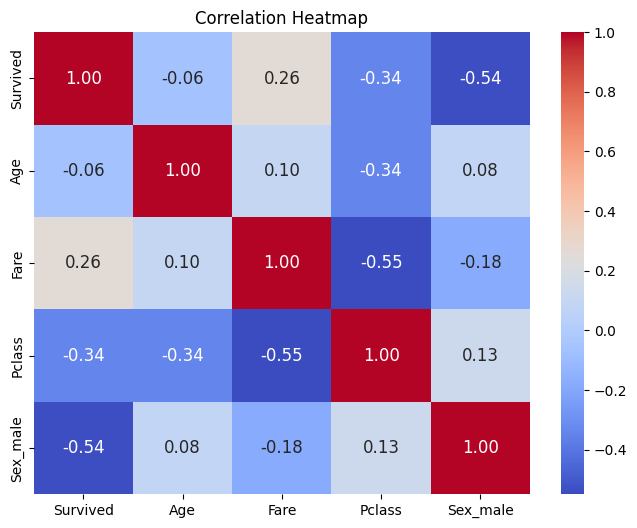

In [49]:
# Perform one-hot encoding for the 'Sex' column
titanic_data_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Compute the correlation matrix
correlation_matrix = titanic_data_encoded[['Survived', 'Age', 'Fare', 'Pclass', 'Sex_male']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap')
plt.show()

## Conclusion: The most important factor in determining survival of the Titantic incident is gender.

As we can see from the heatmap above, there are no overwhelmingly decisive factor in survival of the incident.  However, we could still observe that gender stands out with a comparatively high correlation between survival of -54%, which means being a male is moderately negatively corrleated with one's survival, while class is only weakly negatively correlated (-34%), and age has nearly no linear relationship with survival (-6%).

## That does not mean other factors don't matter ##
The heatmap is just the tip of the iceburg.  That's why I decided to put it at the end of all the graphs to minimise your likelihood to jump to the conclusion and just scroll to the end.  As mentioned, class is weakly negatively correlated with survival, but as we could judge from the bar chart "Survival Distribution by Passenger Class" that a passenger in the third-class cabin was more likely to be killed, despite the cabin had the most passengers of the cruise.  What's more, the number of survived passenger in the third-class cabin was less than that of the first-class alonne.  From the bar chart, we could also observe an apparent correlation - the lower the class, the more death there were.  That is why we could boldly assume that passenger in the upper class cabins were given some sort of preference on means of survival, such as access to a lifeboat like what we see in the Titanic movie.

## Women probably first, but children... hmm **
In the histogram "Survival Distribution by Age", we could see that the age groups that were most likely to survive from the incident was late teens to 30s, while children between the age of 0 and 10 were unlikely to survive.  However, that does not mean that it is appropriate for us to draw the conclusion that children were not given the priority.  In such a tragic incident, it is very possible for children to be too weak to survive many factors, such as hunger, hypothermia and diseases, even priority to lifeboats were given.  In conclusion, we may not have enough information to judge if children were given priority to lifeboats.

## And one more thing: having not too many family member may have helped ##
As I tried to look into the relationship between survival and other factors, I found the relationship between having sibling/spouse on board and survival interesting.  As shown in the bar chart "Survival Distribution Number of Siblings/Spouses Aboard", the only group that is more likely to live than die is those who have only one family member onboard.  Persoanlly, I opine that this is because those who have only one family member could help each other out, but having more than one family member may break the balance of mutual assistance, making it more difficult to care for them.  Also, it is more likely for familes with more than two to include vulnerable individuals, such as elderly and babies, who are less likely to be physically strong enough to survive.